# Recurrent Neural Networks

https://github.com/saqemlas/deep-learning-specialization/blob/main/5_SequenceModels/week_1/Assignment/Building_a_Recurrent_Neural_Network_Step_by_Step.ipynb

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

In [2]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

In [3]:
start_char = 1
oov_char = 2  # out of vocabulary
index_from = 3

In [4]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features, maxlen=maxlen, start_char=start_char, oov_char=oov_char, index_from=index_from)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів

In [5]:
input_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [10]:
len(input_train[1])

189

In [11]:
# vocabulary
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [12]:
# Reverse the word index to obtain a dict mapping indices to words
# And add `index_from` to indices to sync with `x_train`
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)
# Update `inverted_word_index` to include `start_char` and `oov_char`
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"
# Decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in input_train[0])
decoded_sequence

"[START] this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert [OOV] is an amazing actor and now the same being director [OOV] father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for [OOV] and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also [OOV] to the two little boy's that played the [OOV] of norman and paul they were just brilliant children are often left out of the [OOV] list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [13]:
# padding
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
# truncation - зрізання речення за межами максимальної довжини
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

In [15]:
input_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [16]:
len(input_train[0])

500

In [18]:
input_train[:]

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

In [19]:
model = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шар для перетворення слів в вектори фіксованої довжини
model.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# Додавання SimpleRNN шару з 32 вузлами
model.add(SimpleRNN(32))
# Параметр: кількість вузлів (розмір прихованого стану)

# Додавання Dense шару з одним вузлом та активацією sigmoid
model.add(Dense(1, activation='sigmoid'))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)

In [20]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
#len(model.layers[0].weights[0][0])
len(model.layers[0].weights[0][0])# one vector of length 32 per word -> this is learnt

32

In [23]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

Epoch 1/5
126/126 [==============================] - 8s 55ms/step - loss: 0.6324 - acc: 0.6336 - val_loss: 0.6053 - val_acc: 0.6599
Epoch 2/5
126/126 [==============================] - 7s 55ms/step - loss: 0.4224 - acc: 0.8176 - val_loss: 0.3948 - val_acc: 0.8336
Epoch 3/5
126/126 [==============================] - 7s 58ms/step - loss: 0.3055 - acc: 0.8754 - val_loss: 0.3550 - val_acc: 0.8533
Epoch 4/5
126/126 [==============================] - 7s 58ms/step - loss: 0.2336 - acc: 0.9090 - val_loss: 0.4075 - val_acc: 0.8243
Epoch 5/5
126/126 [==============================] - 7s 57ms/step - loss: 0.1681 - acc: 0.9406 - val_loss: 0.4023 - val_acc: 0.8385


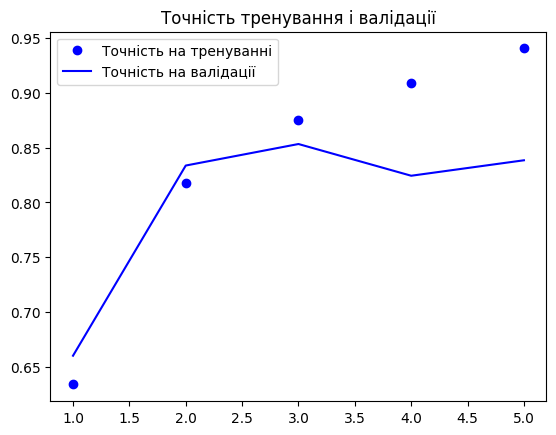

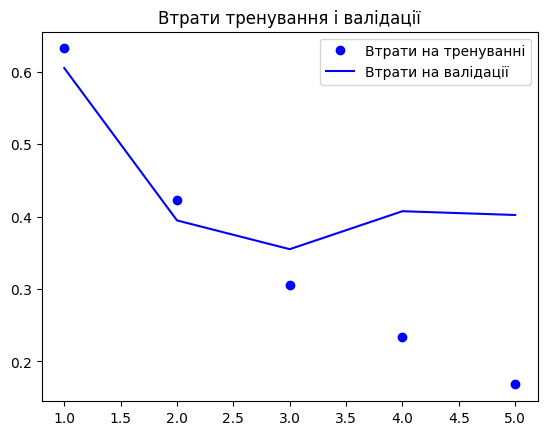

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

## Embedding
![embedding](https://textbook.edu.goit.global/python/data-science-remaster/v1/img/module-11/example3.png)

In [25]:
# Let's take a detailed look at how the Embedding layer and the SimpleRNN layer can be implemented
import numpy as np

# Custom implementation of the Embedding layer
class CustomEmbedding:
    def __init__(self, input_dim, output_dim):  # max_features (10000), vector_size (32)
        self.input_dim = input_dim
        self.output_dim = output_dim
        # Initialize embedding matrix with random values
        self.embeddings_matrix = np.random.randn(input_dim, output_dim)

    def forward(self, input_sequence):
        # Retrieve embeddings for input sequence
        embeddings = [self.embeddings_matrix[word_index] for word_index in input_sequence]
        return np.array(embeddings)

## RNN and hidden layers

## Sequence classification
![embedding](https://textbook.edu.goit.global/python/data-science-remaster/v1/img/module-11/example3.png)

In [26]:
# Custom implementation of the SimpleRNN layer
class CustomSimpleRNN:
    def __init__(self, input_dim, hidden_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        # Initialize weights for input-to-hidden and hidden-to-hidden connections
        self.Wx = np.random.randn(input_dim, hidden_dim)
        self.Wh = np.random.randn(hidden_dim, hidden_dim)
        # Initialize bias
        self.b = np.zeros((1, hidden_dim))
        # Initialize hidden state
        self.h = None

    def forward(self, input_sequence):
        # Initialize hidden state with zeros
        self.h = np.zeros((1, self.hidden_dim))
        # Iterate over each timestep in input sequence
        for input_t in input_sequence:
            # Compute hidden state at current timestep
            self.h = np.tanh(np.dot(input_t, self.Wx) + np.dot(self.h, self.Wh) + self.b)
        return self.h



In [27]:
# Custom implementation of the Dense layer - for a sequence classification
class CustomDense:
    def __init__(self, input_dim, output_dim, activation):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.activation = activation
        # Initialize weights and bias
        self.W = np.random.randn(input_dim, output_dim)
        self.b = np.zeros((1, output_dim))

    def forward(self, x):
        # Compute affine transformation
        z = np.dot(x, self.W) + self.b
        # Apply activation function
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-z))
        elif self.activation == 'relu':
            return np.maximum(0, z)

In [28]:
# Instantiate custom layers
custom_embedding_layer = CustomEmbedding(input_dim=max_features, output_dim=32)  # max_features = 10000
custom_simple_rnn_layer = CustomSimpleRNN(input_dim=32, hidden_dim=32)
custom_dense_layer = CustomDense(input_dim=32, output_dim=1, activation='sigmoid')


In [29]:
input_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [30]:
# Forward pass through custom layers

embedded_sequence = custom_embedding_layer.forward(input_train[0])
len(embedded_sequence) # each word encoded into a 32-element vector

500

In [31]:
embedded_sequence

array([[ 1.34205103,  0.60531236,  0.8915509 , ..., -1.18405646,
        -0.24901322,  0.27346162],
       [ 1.34205103,  0.60531236,  0.8915509 , ..., -1.18405646,
        -0.24901322,  0.27346162],
       [ 1.34205103,  0.60531236,  0.8915509 , ..., -1.18405646,
        -0.24901322,  0.27346162],
       ...,
       [ 1.15187014, -2.00624673, -2.32066682, ..., -1.09495544,
        -0.10735198, -0.17295561],
       [-0.47808196,  0.33384153,  2.63753889, ..., -0.57149445,
        -0.72189209,  0.31934802],
       [ 1.83500448, -1.8588288 ,  0.11108448, ...,  1.25248929,
        -0.4947716 , -0.98480359]])

In [32]:
embedded_sequence[-1]

array([ 1.83500448, -1.8588288 ,  0.11108448,  0.09550488, -2.12787236,
       -1.4440113 ,  2.22088023, -0.62463234, -0.49240386,  0.36505549,
       -0.23821561,  1.34947738, -0.02882566,  0.04862446, -0.44340656,
        1.76615594, -0.85315826, -0.25096261, -1.34954945, -0.59432609,
        1.36104974,  0.48750019,  1.42552158, -0.20617323,  0.16329025,
        1.92827357, -0.9525169 , -0.78411404,  0.14484285,  1.25248929,
       -0.4947716 , -0.98480359])

In [33]:
rnn_output = custom_simple_rnn_layer.forward(embedded_sequence)
rnn_output

array([[-0.99999992,  1.        ,  0.9999979 , -1.        ,  0.99996409,
        -0.99859234,  0.38563669,  0.99999994,  0.390325  , -0.64710721,
         0.84675181, -1.        , -0.99999994,  0.99999999,  0.99998609,
         0.99931623,  0.69445398,  1.        , -0.98788055, -1.        ,
         0.22873046, -0.9999984 ,  1.        , -0.99965753, -1.        ,
         0.0451253 ,  0.99999997,  0.99998371,  1.        ,  0.99999846,
        -0.99999998, -0.99999191]])

In [34]:
predictions = custom_dense_layer.forward(rnn_output)
predictions

array([[0.98746357]])

In [35]:
# Backward pass through custom layers
loss = predictions - y_train[0]  # Gradient of loss with respect to dense layer output
loss[0]

array([-0.01253643])

In [36]:
y_train[0]

1

In [38]:
custom_simple_rnn_layer.Wx

array([[ 1.07848132,  0.34285036,  0.40724135, ...,  2.08893018,
         0.83890043, -0.37789425],
       [ 2.51812782, -1.05103476, -0.91833532, ..., -0.07699413,
         0.19760141,  0.12016476],
       [-0.53166345, -1.4072614 ,  0.67347985, ...,  0.61271841,
        -1.43853555,  1.06652164],
       ...,
       [-0.41035273, -0.54413741, -2.01268416, ...,  0.01782721,
         0.88437388, -0.19226893],
       [ 0.65115379, -0.01857769,  0.14339749, ...,  0.82970146,
         0.00730193,  1.25739039],
       [ 0.32734749,  0.56145898,  0.05375839, ..., -0.0475224 ,
        -0.0044362 ,  0.77044512]])

### Token classification

In [39]:
import numpy as np

# для порівняння:
"""
class CustomSimpleRNN:
    def __init__(self, input_dim, hidden_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.Wx = np.random.randn(input_dim, hidden_dim)
        self.Wh = np.random.randn(hidden_dim, hidden_dim)
        self.b = np.zeros((1, hidden_dim))
        self.h = None

    def forward(self, input_sequence):
        # Initialize hidden state with zeros
        self.h = np.zeros((1, self.hidden_dim))
        for input_t in input_sequence:
            self.h = np.tanh(np.dot(input_t, self.Wx) + np.dot(self.h, self.Wh) + self.b)
        return self.h
"""
class CustomSimpleRNN:
    def __init__(self, input_dim, hidden_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.Wx = np.random.randn(input_dim, hidden_dim)
        self.Wh = np.random.randn(hidden_dim, hidden_dim)
        self.b = np.zeros((1, hidden_dim))
        self.h = None

    def forward(self, input_sequence):
        self.h = np.zeros((len(input_sequence), self.hidden_dim))
        for t in range(len(input_sequence)):
            self.h[t] = np.tanh(np.dot(input_sequence[t], self.Wx) + np.dot(self.h[t-1], self.Wh) + self.b)
        return self.h


In [40]:
class CustomDense:
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.W = np.random.randn(input_dim, output_dim)
        self.b = np.zeros((1, output_dim))

    def layer(self, x):
        z = np.dot(x, self.W) + self.b
        return z
    
    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def forward(self, x):
        z = self.layer(x)
        return self.softmax(z)

In [41]:
# Instantiate custom layers
custom_embedding_layer = CustomEmbedding(input_dim=max_features, output_dim=32)
custom_simple_rnn_layer = CustomSimpleRNN(input_dim=32, hidden_dim=32)
# Output dimension is set to the number of tokens in the input sequence
num_classes = 2  # Assuming `maxlen` is the maximum length of input sequence
custom_dense_layer = CustomDense(input_dim=32, output_dim=num_classes)

# Forward pass through custom layers
embedded_sequence = custom_embedding_layer.forward(input_train[0])
embedded_sequence

array([[ 0.90820625,  0.44313851,  2.14337225, ...,  1.76771298,
         0.03340157,  0.07776486],
       [ 0.90820625,  0.44313851,  2.14337225, ...,  1.76771298,
         0.03340157,  0.07776486],
       [ 0.90820625,  0.44313851,  2.14337225, ...,  1.76771298,
         0.03340157,  0.07776486],
       ...,
       [ 0.96979826, -0.07930466,  0.05068523, ...,  0.03212451,
         1.34392952,  2.22382086],
       [-0.43556073,  3.03352482,  1.21428462, ...,  0.46785632,
        -0.20085782, -0.98248342],
       [ 0.78536607, -0.13629601,  0.30903118, ..., -0.40076886,
         0.24054686, -1.76531398]])

In [44]:
rnn_output = custom_simple_rnn_layer.forward(embedded_sequence)
len(rnn_output[0])

32

In [45]:
predictions = custom_dense_layer.forward(rnn_output)
predictions

array([[5.53750755e-05, 9.99944625e-01],
       [1.94370515e-02, 9.80562948e-01],
       [6.96511894e-02, 9.30348811e-01],
       [7.95343953e-03, 9.92046560e-01],
       [1.49663279e-04, 9.99850337e-01],
       [3.23773503e-07, 9.99999676e-01],
       [1.39979839e-04, 9.99860020e-01],
       [9.17681223e-03, 9.90823188e-01],
       [6.97164770e-06, 9.99993028e-01],
       [5.04609385e-06, 9.99994954e-01],
       [3.94124832e-07, 9.99999606e-01],
       [6.76420310e-06, 9.99993236e-01],
       [1.73394307e-04, 9.99826606e-01],
       [1.24808620e-07, 9.99999875e-01],
       [4.95056206e-08, 9.99999950e-01],
       [1.59357801e-04, 9.99840642e-01],
       [9.38089958e-03, 9.90619100e-01],
       [5.08881417e-04, 9.99491119e-01],
       [2.50524717e-06, 9.99997495e-01],
       [3.56576243e-04, 9.99643424e-01],
       [2.03232020e-05, 9.99979677e-01],
       [9.94624029e-07, 9.99999005e-01],
       [1.41504062e-05, 9.99985850e-01],
       [4.85222762e-05, 9.99951478e-01],
       [7.863390

## Text generation

In [46]:
class CustomSimpleRNNGeneration:
    def __init__(self, input_dim, hidden_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.Wx = np.random.randn(input_dim, hidden_dim)
        self.Wh = np.random.randn(hidden_dim, hidden_dim)
        self.b = np.zeros((1, hidden_dim))
        self.h = None

    def forward(self, input_sequence):
        # Initialize hidden state with zeros
        self.h = np.zeros((1, self.hidden_dim))
        for input_t in input_sequence:
            self.h = np.tanh(np.dot(input_t, self.Wx) + np.dot(self.h, self.Wh) + self.b)
        return self.h

# Instantiate custom layers
custom_embedding_layer = CustomEmbedding(input_dim=max_features, output_dim=32)
custom_simple_rnn_layer = CustomSimpleRNNGeneration(input_dim=32, hidden_dim=32)
# Output dimension is set to the vocabulary size, representing the probability distribution over characters
vocab_size = 10000  # Example vocabulary size
custom_dense_layer = CustomDense(input_dim=32, output_dim=vocab_size)

# Forward pass through custom layers
embedded_sequence = custom_embedding_layer.forward(input_train[0])
embedded_sequence

array([[-1.0369061 , -0.65557827,  1.21960639, ..., -1.08516995,
         2.58533963,  1.34565287],
       [-1.0369061 , -0.65557827,  1.21960639, ..., -1.08516995,
         2.58533963,  1.34565287],
       [-1.0369061 , -0.65557827,  1.21960639, ..., -1.08516995,
         2.58533963,  1.34565287],
       ...,
       [ 0.61475231, -1.46141393, -1.97326638, ...,  0.39507344,
        -0.70432407, -0.61237141],
       [ 0.41582079,  0.28435132,  1.09001732, ...,  0.77275904,
         0.51072913,  0.63321195],
       [-2.05123361, -0.38087277,  0.02651061, ...,  1.54247989,
        -0.27345741, -0.63177226]])

In [47]:
rnn_output = custom_simple_rnn_layer.forward(embedded_sequence)
rnn_output

array([[-0.99999022, -0.99999713,  0.99422491,  0.99996105, -1.        ,
        -0.99997737,  0.16334667, -0.98928835,  0.99464497,  0.999958  ,
        -1.        ,  0.99999999, -0.9999051 ,  0.13315378, -0.99999979,
         0.99999784,  0.84501921, -0.99999774,  1.        , -0.99999956,
         0.99956874, -1.        ,  0.99998577, -0.88589819,  0.78501962,
        -0.99999994,  1.        ,  1.        , -0.99931118,  0.99999954,
         0.84734635, -0.9999507 ]])

In [48]:
predictions = custom_dense_layer.forward(rnn_output)
len(predictions[0])

10000

In [49]:
predictions

array([[4.46344957e-07, 2.15629840e-08, 2.12964969e-10, ...,
        2.49995085e-12, 5.12450759e-11, 4.40819077e-11]])

In [50]:
# Assuming `start_sequence` is a seed sequence to start the generation process
start_sequence = "hello"

# Initialize the generated text with the seed sequence
generated_text = [start_sequence]

# Set the number of words to generate
num_words_to_generate = 10

# Generate text character by character
for _ in range(num_words_to_generate):
    # Convert the current generated text to input sequence
    input_sequence = [word_index[char] for char in generated_text]
    print(input_sequence)
    input_sequence = np.array(input_sequence)[np.newaxis, :]  # Add batch dimension
    
    # Forward pass through custom layers
    embedded_sequence = custom_embedding_layer.forward(input_sequence)
    rnn_output = custom_simple_rnn_layer.forward(embedded_sequence)
    predictions = custom_dense_layer.forward(rnn_output)
    
    # Sample the next character based on the output distribution
    next_char_index = np.argmax(predictions[-1])
    next_char = inverted_word_index[next_char_index]
    
    # Append the next character to the generated text
    generated_text.append(next_char)

print("Generated text:", generated_text)

[4822]
[4822, 1645]
[4822, 1645, 6196]
[4822, 1645, 6196, 757]
[4822, 1645, 6196, 757, 7468]
[4822, 1645, 6196, 757, 7468, 277]
[4822, 1645, 6196, 757, 7468, 277, 8158]
[4822, 1645, 6196, 757, 7468, 277, 8158, 5878]
[4822, 1645, 6196, 757, 7468, 277, 8158, 5878, 2016]
[4822, 1645, 6196, 757, 7468, 277, 8158, 5878, 2016, 3670]
Generated text: ['hello', 'bond', 'joker', 'mention', 'evans', 'once', 'idealistic', 'voted', 'sea', 'spring', 'alcoholism']


### Encoder-decoder

![encoder-decoder](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*1JcHGUU7rFgtXC_mydUA_Q.jpeg)

https://towardsdatascience.com/understanding-encoder-decoder-sequence-to-sequence-model-679e04af4346

In [51]:
from keras.models import Model
from keras.layers import Input, Embedding, SimpleRNN, Dense

# Define input sequence length and dimensions
max_features = 10000
input_length = 500
embedding_dim = 32
hidden_units = 32

# Encoder
encoder_inputs = Input(shape=(input_length,))
encoder_embedding = Embedding(max_features, embedding_dim)(encoder_inputs)
encoder_rnn, encoder_state = SimpleRNN(hidden_units, return_state=True)(encoder_embedding)

# Decoder
decoder_inputs = Input(shape=(input_length,))
decoder_embedding = Embedding(max_features, embedding_dim)(decoder_inputs)
decoder_rnn = SimpleRNN(hidden_units, return_sequences=True)(decoder_embedding, initial_state=encoder_state)
decoder_outputs = Dense(max_features, activation='softmax')(decoder_rnn)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [52]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 500)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 500)]                0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 500, 32)              320000    ['input_1[0][0]']             
                                                                                                  
 embedding_2 (Embedding)     (None, 500, 32)              320000    ['input_2[0][0]']             
                                                                                              